# LU1 (Working with data)

## 0. Setup

Let's start to mount the drive (it's not possible to mount a subfolder, only top-level Drive):

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Now, you need to guarantee that you are working in the right directory. Please find the path of your files:
1. Open the left pane
2. Open the "content" folder and the followings until you reach "learning_unit_1" folder
3. Once you get "learning_unit_1", right-click on it and click on "Copy path"
4. Now, create a new string variable called ***path*** with that value (don't forget the quotes, check the example on the following cell)

In [0]:
path='/content/gdrive/My Drive/Colab Notebooks/data_science_101_tutorial/learning_unit_1/'

In [0]:
import sys
sys.path.append(path)

In [0]:
# imports, feel free to ignore this for now:
import pandas as pd
from matplotlib import pyplot as plt
from utils import get_toy_data
% matplotlib inline

## 1. Loading data

Great, we're ready to get to work! Let's start by loading our dataset, in our case some mushrooms! 

![title](https://pics.me.me/all-mushrooms-are-edible-some-orthemjusttheonce-imgflip-com-mushroom-imgflip-53720172.png)

You already have some mushroom datasets in your `data` folder. 

We will load them using Pandas, using [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [0]:
# load the csv that is at path data/mushrooms.csv, into a Pandas DataFrame called data
data = pd.read_csv(path + 'data/mushrooms.csv')

# print the type
print('Our dataset is now of the following type: %s' % type(data))

Our dataset is now of the following type: <class 'pandas.core.frame.DataFrame'>


This dataset will now be a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). 

It's ok (at first) to think of DataFrames as tables, a bit like spreadsheets. 

## 2. Understanding data 

The first thing to do with any dataset is... to look at it! 

Let's use [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) to look at the first 5 lines of our DataFrame

In [0]:
data.head(5)

gill-color gill-size  ... is_poisonous height
0          k         n  ...            1    4.6
1          k         b  ...            0    4.8
2          n         b  ...            0    5.6
3          n         n  ...            1    4.8
4          k         b  ...            0    4.5

[5 rows x 6 columns]

How many rows and columns do we have? 

We can find out with the [.shape](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html) command

In [0]:
data.shape

(8124, 6)

What are the columns?

In [0]:
data.columns

Index(['gill-color', 'gill-size', 'spore-print-color',
       'stalk-surface-above-ring', 'is_poisonous', 'height'],
      dtype='object')

We can subset a column, by using brackets notation: 

In [0]:
# subset the column is_poisonous, and save it into a Pandas Series called poison 
poison = data['is_poisonous']

# print the type 
print('poison is a variable of the following type: %s' % type(poison))

poison is a variable of the following type: <class 'pandas.core.series.Series'>


You will notice that `poison` is now a Pandas Series (fancy name for "column"). Don't worry too much about this for now. 

We can use [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to understand how many poisonous and non-poisonous mushrooms we have

In [0]:
# How many poisonous and non poisonous mushrooms do we have? 
data['is_poisonous'].value_counts()

0    4208
1    3916
Name: is_poisonous, dtype: int64

Let's see another column: 

In [0]:
# How many of each gill color do we have? 
data['gill-color'].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

Sometimes, we have continuous variables, such as `height`.  
If we do `value_counts` on `height` is will be pretty useless, as it has too many unique values. 

In these cases, using [a histogram](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html) is generally better: 

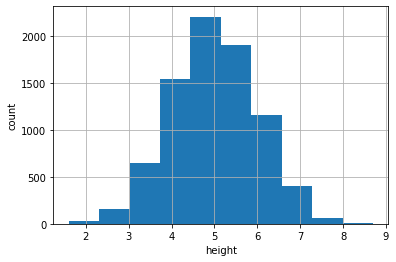

In [0]:
# draw a histogram for the height column
data['height'].hist() # show different bins, by deafult: bins=20
# the following is Matplotlib styling code
plt.xlabel('height')
plt.ylabel('count')
plt.show()

For a continuous variable, we can get a bunch of descriptive statistics: 

In [0]:
# Mean mushroom height: 
data['height'].mean()

4.996898079763664

In [0]:
# Minimum mushroom height: 
data['height'].min()

1.6

In [0]:
# max mushroom height: 
data['height'].max()

8.7

We can also look at a single mushroom, but subsetting the second line: 

In [0]:
data.iloc[2]  # get the second line 

gill-color                    n
gill-size                     b
spore-print-color             n
stalk-surface-above-ring      s
is_poisonous                  0
height                      5.6
Name: 2, dtype: object

## 3. Groupby

Ok, now for something a bit trickier. 

We want to know what is the percentage of mushrooms that are poison, for each "color of spore-print" (whatever a spore-print is). 

So, we need to `groupby` the color of the spore, and then take the `mean` of `is_poisonous`

In [0]:
# mean poison by color = grouping by sprint color, take the mean of each group's is_poison
mean_poison_by_color = data.groupby('spore-print-color')['is_poisonous'].mean()

So what does this look like?

In [0]:
mean_poison_by_color

spore-print-color
b    0.000000
h    0.970588
k    0.119658
n    0.113821
o    0.000000
r    1.000000
u    0.000000
w    0.758794
y    0.000000
Name: is_poisonous, dtype: float64

As often happens, it is easier to just plot this, by adding a `.plot` at the end. In this case we 

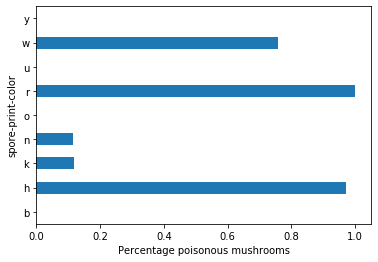

In [0]:
# plot the mean_poison_by_color, with a horizontal bar plot
mean_poison_by_color.plot(kind='barh')
# matplotlib styling (axis labels)
plt.xlabel('Percentage poisonous mushrooms')
plt.show()

Very interesting, we can tell that if the color is `r` (presumably red) the mushroom is always poisonous, but if is `y` (probably yellow) it is never poisonous. 

## 4. Dummifying 

As you might notice, our dataset has multiple types. We have features that are categorical (contain strings), such as `gill-color`, a continuous variable (`height`), and a discrete variable (`is_poisonous`).

In [0]:
# just calling head so we can see the data again 
data[['gill-color', 'spore-print-color', 'is_poisonous', 'height']].head(3)

gill-color spore-print-color  is_poisonous  height
0          k                 k             1     4.6
1          k                 n             0     4.8
2          n                 n             0     5.6

For some applications, such as making predictions, we need all the data to be numerical. 

For that we have an excellent tool called [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html), that will _one hot encode_ (make 0 or 1) our categorical data. 

Easier with an example: 

In [0]:
toy_data = get_toy_data()

# let's look at it 
toy_data

a    b    c
0  1  cat  yes
1  2  cat  yes
2  2  dog   no

Now let's get dummies on this dataset

In [0]:
pd.get_dummies(toy_data)

a  b_cat  b_dog  c_no  c_yes
0  1      1      0     0      1
1  2      1      0     0      1
2  2      0      1     1      0

So, now let's do this on our mushroom dataset: 

In [0]:
data = pd.get_dummies(data)

In [0]:
data.head()

is_poisonous  height  ...  stalk-surface-above-ring_s  stalk-surface-above-ring_y
0             1     4.6  ...                           1                           0
1             0     4.8  ...                           1                           0
2             0     5.6  ...                           1                           0
3             1     4.8  ...                           1                           0
4             0     4.5  ...                           1                           0

[5 rows x 29 columns]

In [0]:
print('We now have %0.0f rows and %0.0f columns'  % (data.shape[0], data.shape[1]))

We now have 8124 rows and 29 columns


## 5. Saving data

Finally, we'll save our "prepared mushrooms" to a csv, using pandas' to_csv function. 

In [0]:
data.to_csv(path+'data/prepared_mushrooms.csv', # the path where we want it to be saved 
            index=False)  # we don't care about the [0, 1, 2, ...] index. Sometimes the index is relevant, but not here